On this porject I will be analyse the Titanic Data set taken from (https://www.kaggle.com/c/titanic/data)

In [50]:
#Importing data 

import pandas as pd 
from pandas import Series,DataFrame

titanic_df=pd.read_csv('C:/Users/27823/Downloads/titanic/train.csv')

titanic_df.head()#viewing data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


I will anwser the following questions

Who were the passengers on the titanic?
what deck were the passengers on and how does that relate to their class?
Where did the passengers come from ?
who was alone and who was with family ?
What variables helped someone survive ?

In [49]:
import numpy as np 
import matplotlib.pyplot as plot 
import seaborn as sns 
%matplotlib inline 

Who were the passengers on the titanic?

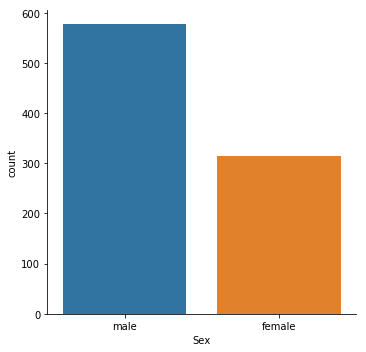

In [22]:
sns.factorplot('Sex',data=titanic_df,kind="count") #Displaying male and female 

Displaying male and female according classes

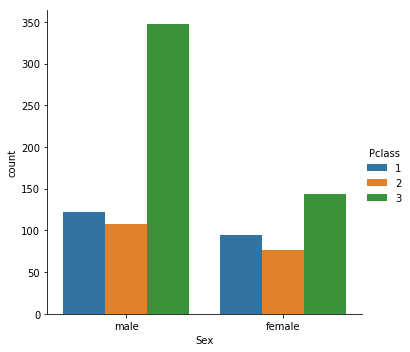

In [24]:
sns.factorplot('Sex',data=titanic_df,kind="count",hue='Pclass') 

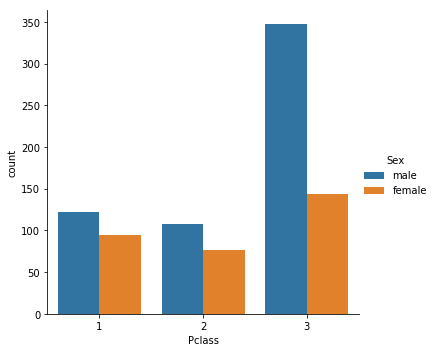

In [25]:
sns.factorplot('Pclass',data=titanic_df,kind="count",hue='Sex') 


In [51]:
def male_female_child(passenger):#function to test if someone is adult 
    age,sex=passenger
    if age <18:
        return'child'
    else:
        return sex 

In [52]:
titanic_df['person']= titanic_df[['Age','Sex']].apply(male_female_child,axis=1) #creating new column  

In [53]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


# Display according to class a Child , Male or female

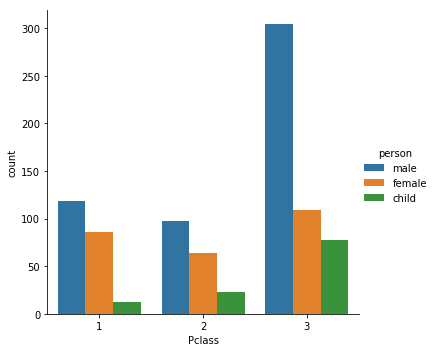

In [30]:
sns.factorplot('Pclass',data=titanic_df,kind="count",hue='person') 

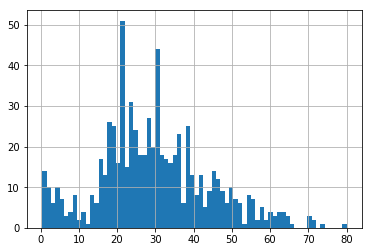

In [32]:
titanic_df['Age'].hist(bins=70) #Age distribution 

In [33]:
titanic_df['Age'].mean()  

29.69911764705882

In [38]:
titanic_df['person'].value_counts()

male      519
female    259
child     113
Name: person, dtype: int64

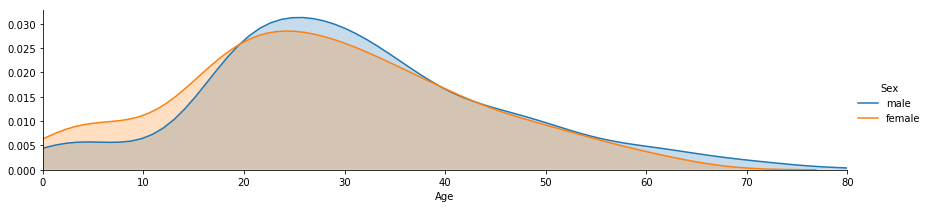

In [42]:
fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

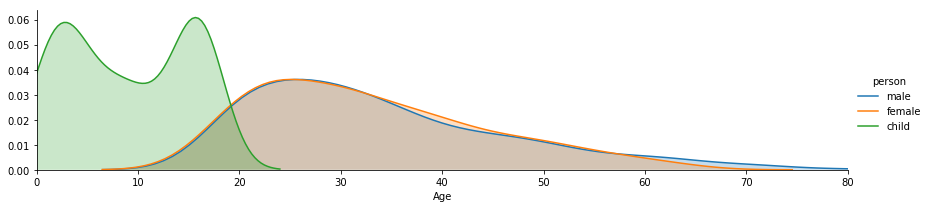

In [43]:
fig=sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

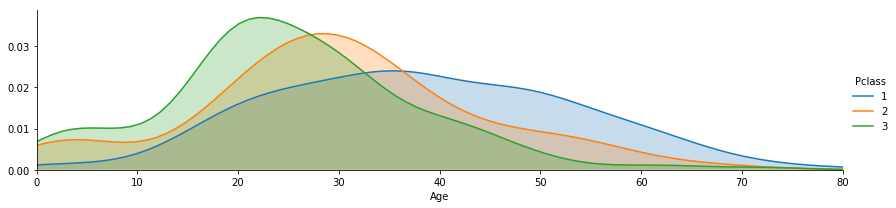

In [44]:
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [45]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


# What deck were the passengers on and how does that relate to their class?

In [54]:
deck=titanic_df['Cabin'].dropna() #dropping all the null values from the Cabin 

In [55]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

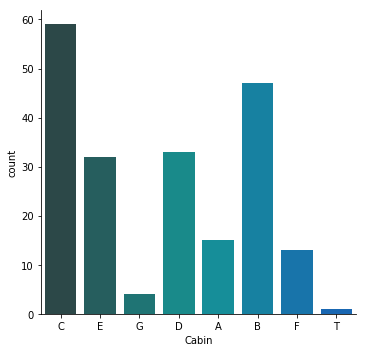

In [57]:
levels = [] 

for level in deck: #Extracting Cabin levels 
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind="count") #Displaying people in different cabins

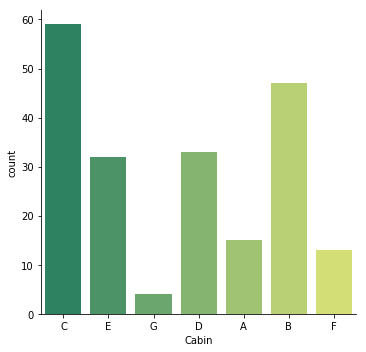

In [58]:
cabin_df = cabin_df[cabin_df.Cabin !='T']
sns.factorplot('Cabin',data=cabin_df,palette='summer',kind="count")

# Where did the passengers come from ?

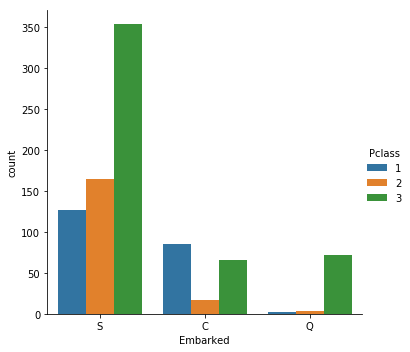

In [71]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind="count") #Displaying where people embarked according classes

# Finding out which people had a family or were alone


In [72]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [74]:
   titanic_df['Alone']=titanic_df.SibSp+titanic_df.Parch

In [76]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'

C:\Python27\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


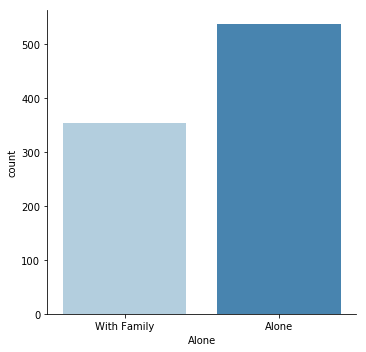

In [78]:
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count') #Displaying how many people were alone

#   What variables helped someone survive ?

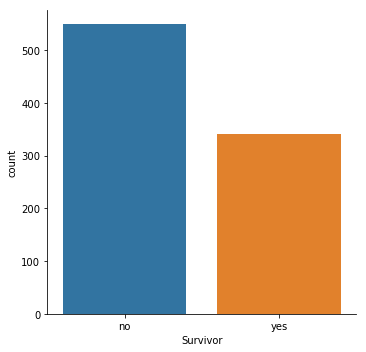

In [81]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})

sns.factorplot('Survivor',data=titanic_df,kind='count')

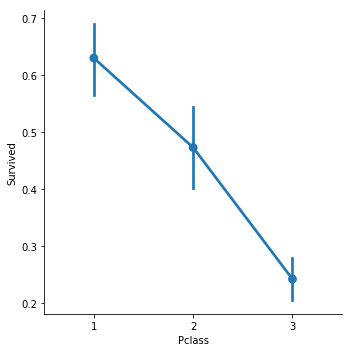

In [82]:
sns.factorplot('Pclass','Survived',data=titanic_df ) # Class vs Survival 

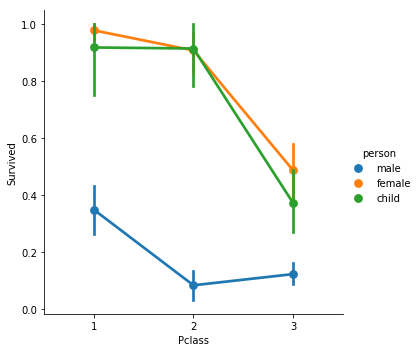

In [83]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df )# Add variables male ,femaleand child into play

# Age vs Survival


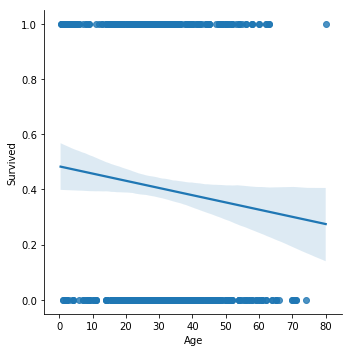

In [84]:
sns.lmplot('Age','Survived',data=titanic_df)

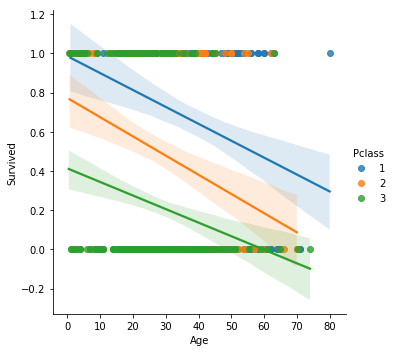

In [87]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df)  

In [88]:
generations=[10,20,40,60,80]

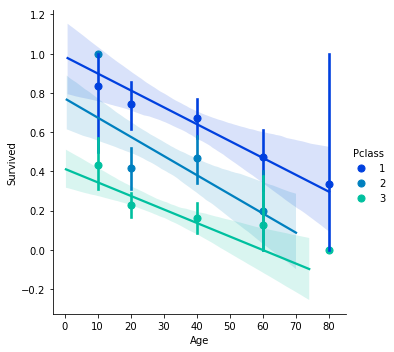

In [89]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

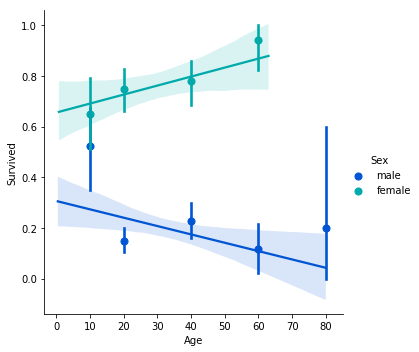

In [90]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

# Did the deck have an effect of the passengers survival rate 

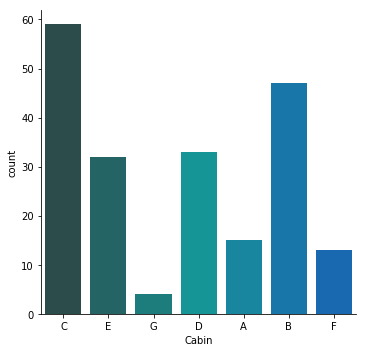

In [98]:
sns.factorplot('Cabin', data=cabin_df, palette='winter_d',kind='count')

In [99]:
cabin_df = pd.concat([cabin_df, titanic_df['Sex']], axis=1)

In [100]:
cabin_df = pd.concat([cabin_df, titanic_df['Survived']], axis=1)

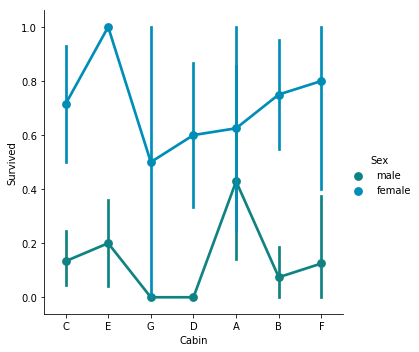

In [102]:
sns.factorplot('Cabin','Survived',data=cabin_df, hue='Sex', palette='winter_d')